In [10]:
import numpy as np
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
mpl.rc('font', family='serif', size=11)
mpl.rc('savefig', bbox='tight')

import dtw
import worg

make_fname_safe = lambda s: s.lower().replace(' ', '-')

In [6]:
T = 50
seed = 424242
verbose = True
f = 90 * (1.01**np.arange(T))  # 1% growth
g0 = np.zeros(T, dtype='f8')    # zero production

DTW
======

In [24]:
def display_dwt(dist, cost, path, xname, yname, offset=2016, vmax=None):
    fig = plt.figure(figsize=(8, 6))
    extent = (offset, offset+cost.shape[1], offset, offset+cost.shape[0])
    plt.imshow(cost[::-1], cmap='viridis', extent=extent, vmin=0.0, vmax=vmax)
    u = offset + np.concatenate([path, np.array([[cost.shape[1]], [cost.shape[0]]])], axis=1)
    plt.plot(u[1], u[0], 'w-')
    plt.axis(extent)
    cb = plt.colorbar()
    cb.set_label('Cost [GWe]', rotation=-90, va='bottom')
    plt.xlabel('time [year]')
    plt.ylabel('time [year]')
    fname = 'cost-{0}-to-{1}'.format(make_fname_safe(xname), make_fname_safe(yname))
    plt.savefig(fname + '.png')
    plt.savefig(fname + '.eps')
    print('Warping between {0} and {1}:'.format(xname, yname))
    print('  Distance is ', dist)

Warping between Demand and Production:
  Distance is  0.755990232857


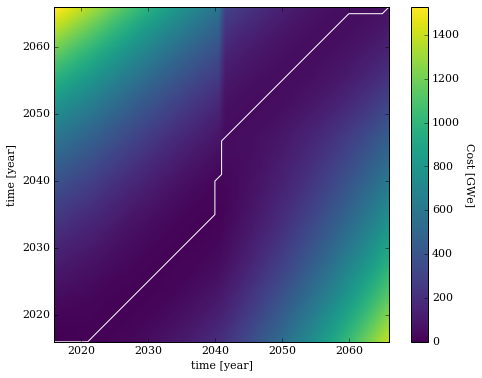

In [25]:
p = np.empty(T, dtype='f8')
p[:T//2] = f[:T//2] * 0.95
p[T//2:] = f[T//2:] * 1.05
dist, cost, path = dtw.dtw(f[:,np.newaxis], p[:,np.newaxis])
display_dwt(dist, cost, path, 'Demand', 'Production')

Optimizations
========

In [3]:
%%time
N = np.asarray(np.ceil(4*(1.01)**np.arange(T)), dtype=int)
state = worg.optimize(f, N, seed=seed, verbose=verbose, method_0='stochastic')

Simulation 3
------------
SimId 65b9d470-2800-4f73-8924-c6b785b6d24b
hyperparameters: [ 8.44155389  5.41756185]
Estimate method is 'stochastic'
Estimate winner is 'stochastic'
Estimate time:   0.0 min 6.491922855377197 sec
Simulation time: 0.0 min 7.2172510623931885 sec
D_s: 2.935123927440842
D: [2.9351239274408418, 14.802403115793279]

Simulation 4
------------
SimId bb0aa87a-2055-4698-8bc2-96d4eb824f21
hyperparameters: [ 7.56552878  4.3505483 ]
Estimate method is 'stochastic'
Estimate winner is 'stochastic'
Estimate time:   0.0 min 6.629546642303467 sec
Simulation time: 0.0 min 7.311304807662964 sec
D_s: 1.5142780541252059
D: [1.5142780541252059, 2.9351239274408418]

Simulation 5
------------
SimId 2b0a0340-007b-45f1-bc15-bd90a80ec59c
hyperparameters: [ 6.4493229   3.72067005]
Estimate method is 'stochastic'
Estimate winner is 'stochastic'
Estimate time:   0.0 min 6.415410280227661 sec
Simulation time: 0.0 min 8.617703437805176 sec
D_s: 1.0749170338271168
D: [1.0749170338271168, 1.51